# Mini Projeto de Análise de Dados

### Importação de Módulos e Arquivos

In [2]:
import pandas as pd

# Importando as bases de dados

clientes_df = pd.read_csv(r'CadastroClientes.csv', sep=';', decimal=',')
funcionarios_df = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal=',')
servicos_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')

# Retirar as colunas que não iremos usar: Estado Civil e Cargo da tabela de Funcionários

funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)

display(funcionarios_df)
display(clientes_df)
display(servicos_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


### 1- Folha Salarial

In [3]:
# Criando a Series 'Salario Total'

funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
display(funcionarios_df)

# Fazendo o cálculo do Salário Total

gastos_salario = funcionarios_df['Salario Total'].sum()

formata = '{:_.2f}'.format(gastos_salario)
formata = formata.replace('.', ',').replace('_', '.')

print('Total da Folha Salarial Mensal é de R$ {} reais.'.format(formata))

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Salario Total
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,38208.04
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística,9915.36
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,28195.32
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36962.66
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística,19104.18
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial,7875.92
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo,42616.32
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial,9605.88


Total da Folha Salarial Mensal é de R$ 2.717.493,22 reais.


### 2- Faturamento

- Nesse momento iremos criar o DataFrame 'faturamentos_df'. Para tal, iremos mesclar o DataFrame 'clientes_df' (somente as Series 'ID Cliente' e 'Valor Contrato Mensal') com o DataFrame servicos_df(somente as Series 'ID Cliente', 'Tempo Total de Contrato (Meses)' ).

In [6]:
# Criando o DataFrame 'faturamentos_df'

faturamentos_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')
display(faturamentos_df)

# Criando a coluna 'Faturamento Total' no DataFrame 'faturamentos_df'

faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
display(faturamentos_df)

# Calculando o faturamento total

faturamento_total = faturamentos_df['Faturamento Total'].sum()

formata2 = '{:_.2f}'.format(faturamento_total)
formata2 = formata2.replace('.', ',').replace('_', '.')

print('O faturamento total anual foi de R$ {} reais.'.format(formata2))

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal
0,1,14,540
1,2,12,1260
2,4,14,2520
3,5,8,3510
4,6,8,2340
...,...,...,...
232,315,4,1575
233,316,8,3690
234,317,6,2385
235,319,14,4185


,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Faturamento Total
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


O faturamento total anual foi de R$ 5.519.160,00 reais.


### 3- Percentual de Funcionários que Fecharam Contratos

- Nesse momento temos que nos preocupar com a possibilidade de haver funcionários que fecheram mais de um contrato.
- Temos então que, antes de calcular quantos funcionários fecharam contratos, eliminar as redundâncias. 
- Usaremos o método .unique( ) para eliminar as redundâncias.

In [7]:
# Cálculo da quantidade de funcionários que fecharam contratos

qtde_funcionario_fecharamcontrato = len(servicos_df['ID Funcionário'].unique())

# Cálculo do total de funcionários

qtde_funcionario_total = len(funcionarios_df['ID Funcionário'])

# Cálculo do percentual de funcionários que fecharam contratos

perc_funcionario_fecharamcontrato = qtde_funcionario_fecharamcontrato / qtde_funcionario_total

print('A quantidade total de funcionários que fecharam contrato foi de: {:.1%}.'.format(perc_funcionario_fecharamcontrato))

A quantidade total de funcionários que fecharam contrato foi de: 86.8%.


### 4- Qtde de Contratos por Área

- Nesse momento iremos mesclar o DataFrame de 'funcionários_df' (somente as Series 'ID Funcionário' e 'Area') com o DataFrame servicos_df (somente a Series 'ID Funcioário')

,ID Funcionário,Area
0,67,Financeiro
1,67,Financeiro
2,67,Financeiro
3,67,Financeiro
4,17,Logística
...,...,...
232,25,Administrativo
233,79,Operações
234,99,Administrativo
235,14,Financeiro


A quantidade de contratos por área é:
______________________________
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64
______________________________


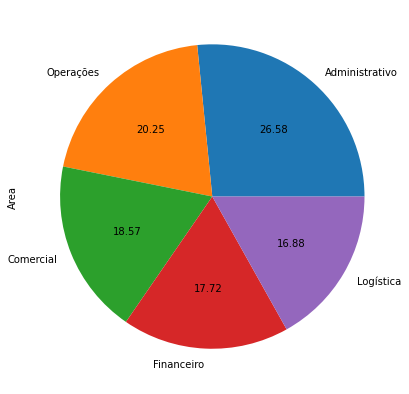

In [26]:
# Mesclando o DataFrame 'servicos_df' com o DataFrame 'funcionarios_df'

contratos_area = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']])
display(contratos_area)

# Cálculo da quantidade de contratos por área

qtde_contratos_area = contratos_area['Area'].value_counts()

print('A quantidade de contratos por área é:')
print('_' * 30)

print(qtde_contratos_area)
print('_' * 30)

ax = qtde_contratos_area.plot.pie(figsize=(7,7), autopct="%.2f");

### 5- Funcionários por Área

A quantidade de funcionários por área é:
______________________________
Area          
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
dtype: int64
______________________________


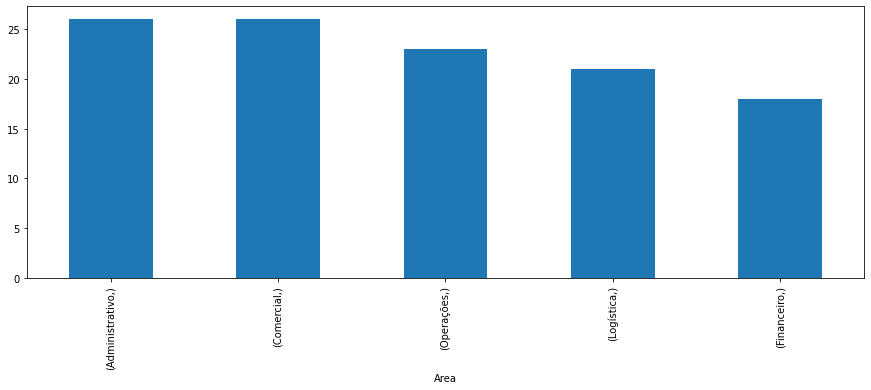

In [25]:
# Cálculo da quantidade de funcionários por área

funcionarios_area = funcionarios_df[['Area']].value_counts()

print('A quantidade de funcionários por área é:')
print('_' * 30)

print(funcionarios_area)
print('_' * 30)

ax = funcionarios_area.plot.bar(figsize=(15,5));

### 6- Ticket Médio Mensal

In [94]:
# Cálculo do ticket médio mensal (Média do valor dos contratos mensais)

ticket_medio = clientes_df['Valor Contrato Mensal'].mean()

formata3 = '{:_.2f}'.format(ticket_medio)
formata3 = formata3.replace('.', ',').replace('_', '.')

print('O valor do ticket médio mensal é de R$ {} reais.'.format(formata3))

O valor do ticket médio mensal é de R$ 2.502,56 reais.
